In [1]:
import pandas as pd
import numpy as np

In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/tensorflow2_p38/bin/python -m pip install --upgrade pip' command.


In [3]:
df = pd.read_csv('train.tsv', sep='\t')
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [4]:
df.iloc[0]

PhraseId                                                      1
SentenceId                                                    1
Phrase        A series of escapades demonstrating the adage ...
Sentiment                                                     1
Name: 0, dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


<AxesSubplot:>

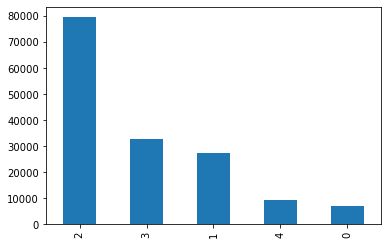

In [6]:
df['Sentiment'].value_counts().plot(kind= 'bar')

In [7]:
seq_len = 512
num_samples = len(df)

num_samples, seq_len

(156060, 512)

In [8]:
from transformers import BertTokenizer

In [9]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [10]:
tokens = tokenizer(df['Phrase'].tolist(), max_length = seq_len,
                  truncation = True, padding = 'max_length',
                  add_special_tokens = True,
                  return_tensors = 'np')

In [11]:
tokens.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [12]:
tokens['input_ids']

array([[  101,   138,  1326, ...,     0,     0,     0],
       [  101,   138,  1326, ...,     0,     0,     0],
       [  101,   138,  1326, ...,     0,     0,     0],
       ...,
       [  101,   170, 25247, ...,     0,     0,     0],
       [  101,   170, 25247, ...,     0,     0,     0],
       [  101, 22572, 12148, ...,     0,     0,     0]])

In [13]:
tokens['attention_mask']

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [14]:
with open('movie-xids.npy', 'wb') as f:
    np.save(f, tokens['input_ids'])
    
with open('movie-xmask.npy', 'wb') as f:
    np.save(f, tokens['attention_mask'])

In [15]:
arr = df['Sentiment'].values
arr

array([1, 2, 2, ..., 3, 2, 2])

In [16]:
arr.shape

(156060,)

In [17]:
arr.max() + 1

5

In [18]:
labels = np.zeros((num_samples, arr.max() + 1))
labels.shape

(156060, 5)

In [19]:
labels[np.arange(num_samples), arr] = 1

In [20]:
labels

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [21]:
with open('movie-labels.npy', 'wb') as f:
    np.save(f, labels)